# Lab 3 : Classification

You have to send the filled notebook named **"Classification_familyname1_familyname2.ipynb"** (groups of 2) by email to *lucca.guardiola@centralesupelec.fr* by November 5, 2020. Please put **"AML-Classification"** in the subject. 



### Summary of the lab session : 


#### I) Basic application of classification models on toy dataset : 
    - Logistic Regression
    - LDA
    - SVM
    - Kernels
    - The ultimate classifier
    
#### II) Marketing project : 
    - Presentation of pandas
    - Feature engineering 
    - Models 

In [1]:
# Import the packages
import pandas as pd 
pd.set_option('display.max_columns', 500)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
import sklearn as sk

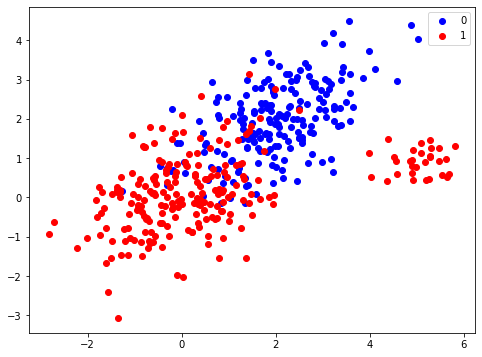

In [2]:
# Import the data 
plt.figure(figsize=(8,6))
data = np.loadtxt('NLS_2.csv',delimiter=",")
X = data[:,:2]
y = data[:,2]

color = ['b','r']
labels = ['0','1']
for i in range(len(color)) : 
    idx=np.where(data[:,2]==i)
    plt.scatter(data[idx,0],data[idx,1], c=color[i], marker='o',label=labels[i])
plt.legend()

### Recap Classification : 
Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping/decision function $(\hat{f})$ from input variables ($X$) to discrete output variables $(y)$.

In a data-science project the common practice is to split randomly your data between three datasets :

- a train dataset for fitting the paramaters of the models
- a test data set to compute the test-error on unseen data and deduce the hyperparameters (like regularisation value C) which minimise the test error 
- finally a generalisation dataset to evaluate the final error of the models i.e the error on unseen data with a tuned model. 

#### => In this Lab session we are going to use only 2 datasets : a train dataset for fitting the parameters and a test-generalisation dataset for finding the best parameters and evaluate the generalisation error.


A more advanced advanced way to split the data is the use of the cross validation, you will see this later normally.


### Task : split your dataset between a train dataset and a test dataset. (The size of the test dataset must be 33% of the size of the dataset)
Use https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
"""Output must be :
X_train : features of the train dataset
y_train : labels of the train dataset
X_test = features of the test dataset 
y_test = labels of the test dataset """


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Logistic Regression - Recap :

The idea is to put a probabilistic model on the Random Variable $Y \text{ (label) }$ given  $ X(\text{features)}$ for an observed data. We suppose that : 
$$ P(Y=1|X=x)=\frac{1}{1+e^{-\langle X,\beta \rangle}}=\frac{1}{1+e^{-(X^1\beta_1 +...X^p\beta_p )}}$$
So the goal of the fitting part is to find the vector $\beta$ maximising the likelihood of the train dataset

### Question : Write the log-likelihood for the train dataset i.e $((x_1,y_1),...(x_n,y_n))$ :

Answer : $\mathcal{L}(Y;\beta,X)=$    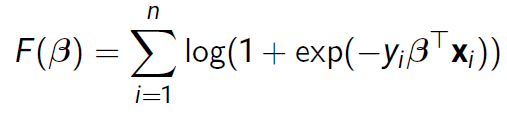



### After the training, $\beta$ is set. How does the model assign the labels for the test dataset i.e $((x'_1,y_1),...(x'_k,y'_k))$. 

Answer : Use the learnt model to predict the unknown label of a new observation, and then the classification is done such that : 
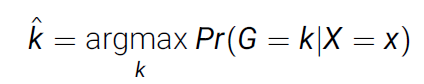

### Task : Fit a Logistic Regression model on the train dataset with arbitrary regularisation
use : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [4]:
#Todo

model= LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

Now it's time to evaluate the performances of our model. There are plenty of metrics for classification problem, we will work with two non neglible metrics.
$$ \text{Accuracy} = \frac{\text{Number of right classifications}}{\text{Number of classifications}} $$


$$Auc = P(\hat{f(X)} >\hat{f(X')}|Y=1 , Y'=0) $$

Given a randomly chosen observation $X$ belonging to class 1, and a randomly chosen observation $X'$ belonging to class 0, the AUC is the probability that the evaluated classification algorithm will assign a higher score to X than to X'. For instance the score of our Logisitic model is $P(Y=1|X=x)$


PS : The AUC could be considered as the most important metric in a classification problem, because it's insentitive to unbalanced dataset.

### TASK : Print the Accuracy and the AUC of our model 
use : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

In [5]:
#TODO

accuracy = accuracy_score(y_test,model.predict(X_test))
print("accuracy = ", accuracy)

y_proba=model.predict_proba(X_test)[:,1]

AUC = roc_auc_score(y_test,y_proba)
print("AUC = ", AUC)

accuracy =  0.7816901408450704
AUC =  0.8975024975024974


We need to tune the hyperparameters especially the regularisation parameter (C).

### Task : Fill error_c_Logistic.
For a list of predefined C values, the function plot_error_c_Logistic will fit a model and compute the error for each value of C in order to select the parameters with the highest accuracy or AUC. 
Return the best C and plot the test accuracy with respect to C, with a L2 regularisation. Try with different C beetwen 0.01 and 1

We can use np.linspace(0.01,1,n) to divide equally [0.01,1] 

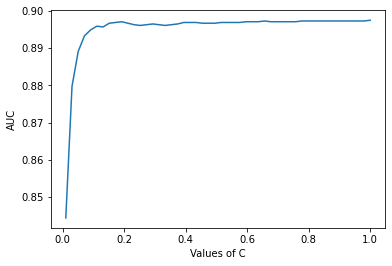

(0.23224489795918368, LogisticRegression(C=0.23224489795918368), 0.7816901408450704, 0.8975024975024974)


In [6]:
#Todo 
def error_c_Logistic(X_train,X_test,y_train,y_test):
    C = np.linspace(0.01,1,50)
    record_acc=[]
    record_auc=[]
    models=[]
    for x in C :
        model = LogisticRegression(C=x)
        model.fit(X_train,y_train)
        record_acc.append(accuracy_score(y_test,model.predict(X_test)))
        record_auc.append(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))
        models.append(model)
    
    top_accuracy = max(record_acc)
    top_auc = max(record_auc)
    top_C = C[record_acc.index(top_accuracy)]
    top_model = models[record_acc.index(top_accuracy)]
    
    record_acc=np.array(record_acc)
    record_auc=np.array(record_auc)
    
    plt.plot(C,record_auc) 
    plt.xlabel("Values of C")
    plt.ylabel("AUC")
    plt.show()
    
    return (top_C,top_model, top_accuracy, top_auc)
        
    #TODO
print(error_c_Logistic(X_train,X_test,y_train,y_test))

### Task : Train a model with the best value of C and return the AUC and the accuracy

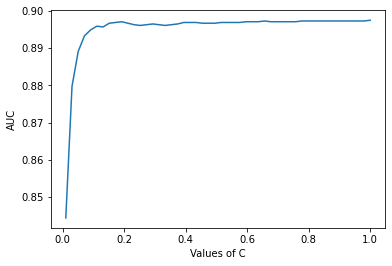

accuracy =  0.7816901408450704
AUC =  0.8975024975024974


In [7]:
#TODO
 

C,model,accuracy,auc = error_c_Logistic(X_train,X_test,y_train,y_test)

print("accuracy = ", accuracy)

print("AUC = ", auc)

# LDA 

As the Logistic Regression, LDA puts a probalistic model on the data. This time $P(Y)$ and $P(X |Y)$ are modelized. It assumes that X are sampled from a K gaussian mixture with K the number of classes.
$$P(Y=k) = \frac{\text{Number of train samples labeled K}}{\text{Number of train sample}}$$

$$P(X=x |Y=k) = \mathcal{N}(x,\mu_k,\Sigma_k) $$



### Question :  How does the model assign the labels for the test dataset 

Answer : with the Bayes law, we just need to find the label k that maximize the product P(Y=k)*P(X=x|Y=k)

### Task : Fit a LDA model on the train dataset and returns the test metrics

In [8]:
#TODO

model = LDA()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_proba=model.predict_proba(X_test)[:,1]
print("accuracy = ", accuracy_score(y_test,y_pred))
print("auc = ", roc_auc_score(y_test,y_proba))

accuracy =  0.7816901408450704
auc =  0.8977022977022977


# SVM
A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier. 

### Question Bonus : Suppose that the labels $\in \{1,-1\}$. Write the Loss fonction $\mathcal{L}(y,x;\theta)$ of the SVM for a train dataset ((x_1,y_1),...(x_n,y_n)). Then compare to the Logistic Regression with Ridge regularization and comment. 

### Answer :

### Task : Fit a SVM model on the train dataset and return the test metrics
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [9]:
model = svm.SVC(probability=True)
model.fit(X_train,y_train)

print("accuracy = ", accuracy_score(y_test,model.predict(X_test)))
print("AUC = ", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

accuracy =  0.8661971830985915
AUC =  0.9378621378621379


# Kernels

A Kernel function transforms the training data so that a non-linear decision surface is transformed to a linear equation in a higher number of dimensions.
Linear discriminant functions can provide very efficient 2-class classifiers, provided that the class features can be separated by a linear decision surface.

The SVM model from sklearn have kernels already implemented. 
### Task : Try SVM with different kernels to increase the test accuracy

In [10]:
model1 = svm.SVC(kernel='linear')
model1.fit(X_train,y_train)

print("accuracy_lin = ", accuracy_score(y_test,model1.predict(X_test)))

model2 = svm.SVC(kernel='poly',degree=5)
model2.fit(X_train,y_train)

print("accuracy_poly = ", accuracy_score(y_test,model2.predict(X_test)))

model3 = svm.SVC(kernel='sigmoid')
model3.fit(X_train,y_train)

print("accuracy_sig = ", accuracy_score(y_test,model3.predict(X_test)))

model = svm.SVC(probability=True)
model.fit(X_train,y_train)

print("accuracy_rbf = ", accuracy_score(y_test,model.predict(X_test)))


accuracy_lin =  0.7887323943661971
accuracy_poly =  0.8450704225352113
accuracy_sig =  0.7253521126760564
accuracy_rbf =  0.8661971830985915


### Plot decision function

In order to visualize the impact of the kernels, we are going to plot the decision fonction for different models : Logistic Regression, LDA, Vanilla SVM, SVM with polynomial kernel, SVM with RBF kernel.
### Just run the code below

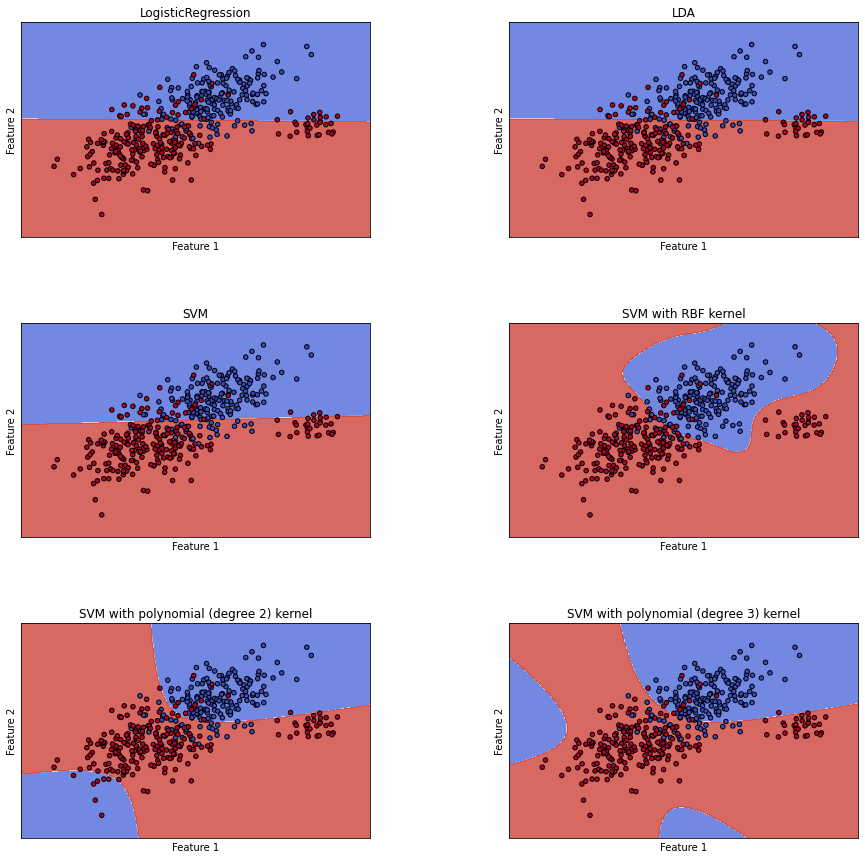

In [11]:

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out




C = 1.0  # SVM regularization parameter

models = (LogisticRegression(C=10),
          LDA(),
          svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=1, C=C),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)
# title for the plots
titles = ('LogisticRegression',
          'LDA',
          'SVM',
          'SVM with RBF kernel',
          'SVM with polynomial (degree 2) kernel','SVM with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.

fig, sub = plt.subplots(3, 2,figsize=(15,15))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Logistic Regression Kernelized

As it has been done with the SVM function, we are going to improve the logistic regression with a Kernel in order to bring a bit more flexibility to the decision function

### Task : Fill the kernel function below, it must transform your input data in a higher dimensionnal space. 
You can use https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html for a polynomial kernel

In [12]:
class Logit_Kernel():
    # Class for Kernelized Logistic Regression :
    model = None
    C=None
    def __init__(self,C):
        self.C=C
        
    def fit(self, X, y):
        self.model=LogisticRegression(C=self.C)
        self.model.fit(self.kernel(X),y)
        
    def predict(self,X):

        return self.model.predict(self.kernel(X))

    def kernel(self,X):
        
        #TODO
        poly=PolynomialFeatures(degree=2)
        X_0=poly.fit_transform(X)
        return X_0
    
        


After filling the kernel function just run the following code. It must print the same decision graph as before.
### Just run the code below

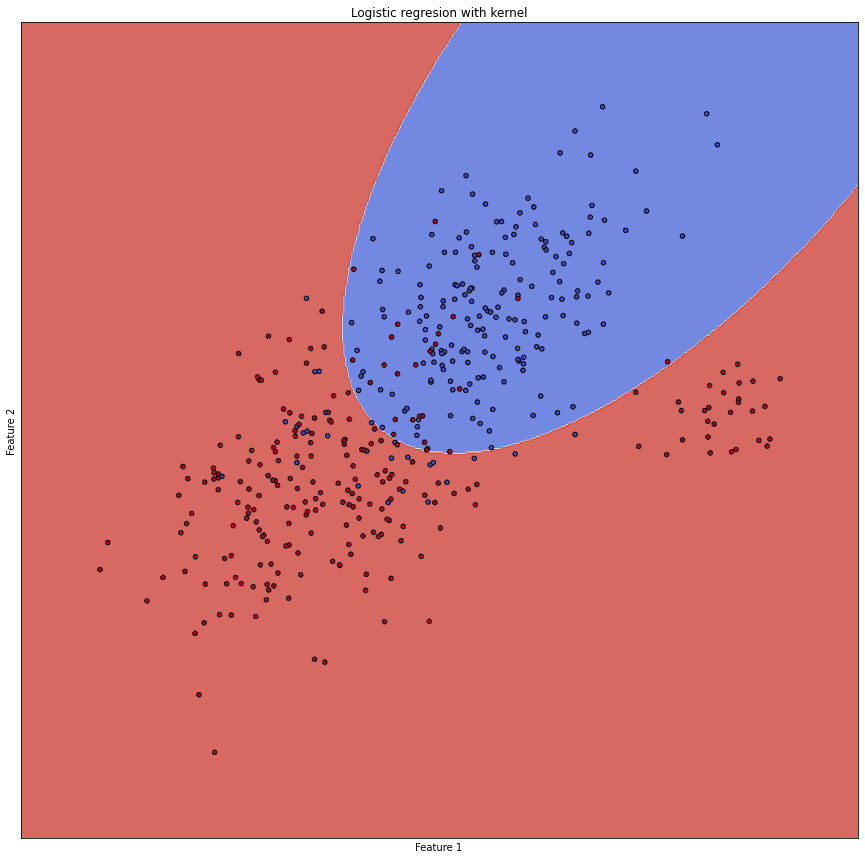

In [13]:
def plot_contours(ax,X,y, **params):
    clf = Logit_Kernel(C=1)
    clf.fit(X,y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



fig, ax = plt.subplots(1,figsize=(15,15))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, X,y,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Feature 1 ')
ax.set_ylabel('Feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Logistic regresion with kernel')

plt.show()

# The ultimate model 
In fact, most of the time in machine learning competition the best models are an aggregation of several models of 
different classes. For instance 1 SVM / 1 Logistic Regression / 1 SVM with kernel. 

But How it works ? It's very easy, there are many ways to aggregate the classifiers but we are going to look at the Voting Classifier. 

### Voting Classifier :
- First you need (preferably) an odd number of classifier 
- You train separatly your classifiers separately with the same train dataset
- For each data in your test dataset, each classifier makes a prediction (i.e a vote) for the label 
- For each data in your test dataset, the label choosen will be the label who has the majority of the votes.


### Task : Fill the fit function with classifiers of your choice and implement the majority rule in the predict function 

In [44]:
class Voting_Classifier(C):
    # Class for Voting classifier
    model_1 = None
    model_2 = None
    model_3 = None
    
    def __init__(self,C):
        self.C=C
        
    def fit(self, X, y,C):
        self.model_1=  LogisticRegression(C=C[0])
        self.model_2 = svm.SVC(probability=True,C=C[1])
        self.model_3= svm.SVC(kernel="poly",degree=3,probability=True,C=C[2])
        self.model_3.fit(X,y)
        self.model_2.fit(X,y)
        self.model_1.fit(X,y)
        
        
    def predict(self,X):
        labels_1=self.model_1.predict(X)
        labels_2=self.model_2.predict(X)
        labels_3=self.model_3.predict(X)

        # Now implement the voting rule : 
        #TODO
        
        clf=[labels_1,labels_2,labels_3]
        
        labels=[]
        for c in range (len(labels_1)):
            binlist =[]
            for j in range (3):
                  binlist.append(clf[j][c]) 
            labels.append(np.argmax(np.bincount(binlist)))
                  
            

        
        
        return labels
    
    # We created here the function predict_proba, based on the predict_proba functions of each method and basic
    # laws of probability
    def predict_proba(self,X):
        proba_1=self.model_1.predict_proba(X)[:,1]
        proba_2=self.model_2.predict_proba(X)[:,1]
        proba_3=self.model_3.predict_proba(X)[:,1]
        #print(proba_3.shape)
        #print(proba_3)
        proba=np.zeros((proba_3.shape[0],))
        for i in range (proba_3.shape[0]):
            proba[i]=  proba_1[i]*proba_2[i]*proba_3[i] +  proba_1[i]*proba_2[i]*(1-proba_3[i]) +  proba_1[i]*(1-proba_2[i])*proba_3[i] +  (1-proba_1[i])*proba_2[i]*proba_3[i]
            
        return proba
     
        


    def kernel(self,X):
        #TODO
        poly=PolynomialFeatures(degree=2)
        X_0=poly.fit_transform(X)
        
        return X_0

TypeError: float expected at most 1 argument, got 3

In [15]:
model = Voting_Classifier(C=0.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.predict_proba(X_test))

[9.51276355e-01 2.30304346e-04 9.68543914e-04 1.04884771e-03
 9.91280399e-01 9.74725710e-01 4.59526145e-03 5.32848841e-03
 1.45627174e-01 1.84764004e-03 9.61250101e-01 1.69043592e-03
 1.36859967e-03 9.58994907e-01 1.48379434e-03 6.84186991e-02
 9.72542933e-01 1.79723399e-02 7.34802004e-03 9.73544771e-01
 9.80880578e-01 9.88137926e-01 9.45652419e-01 1.77367966e-02
 8.15584467e-04 9.62384527e-04 1.98937053e-03 9.66908139e-01
 9.92029333e-01 9.63861050e-01 2.16447196e-02 9.40290383e-01
 9.89403358e-01 1.33127949e-03 8.82063176e-01 3.97485762e-02
 9.64767673e-01 9.67938584e-01 6.68129538e-01 8.65825537e-01
 9.68637600e-01 9.64068298e-01 9.45739618e-01 3.51726895e-01
 1.11397605e-01 7.96824746e-03 9.46250043e-01 1.62819634e-02
 9.58640387e-01 2.84979254e-03 4.09251721e-01 9.69448835e-01
 1.03232585e-01 9.08439050e-01 3.53690776e-04 9.82901480e-01
 9.79538209e-01 4.72264275e-02 4.83635366e-01 8.19268912e-01
 7.05379050e-03 7.87868996e-01 1.38708494e-03 8.53801263e-01
 9.60251632e-01 5.125969

This function will serve for the next exercice 

# Exercice 2 : Classification Project

 Now you are going to apply the methods you've seen on a real-like data science project.
 
 The data is related with direct marketing campaigns of a Portuguese banking institution. 
 The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
 in order to access if the product (bank term deposit) would be (or not) subscribed. 


   The classification goal is to predict if the client will subscribe a term deposit (variable y).
   
## Features - bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
    related with the last contact of the current campaign:
    
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
   #other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Pandas library 

In this lab session we put aside the numpy's arrays, we will use the pandas library for the structure of our dataset. Pandas is preferred to numpy in this domain because of its simplicity and it suits wells for data science projects.

Here is a sample of the most useful pandas commands

In [16]:
#Import the dataset
bank =pd.read_csv('bank-full.csv',sep=';')
bank = bank.drop(bank.loc[bank['y']=='no'].sample(25000).index)
bank = bank.sample(10000)
bank = bank.reset_index(drop=True)

### Task : Above each command, tell what it does

In [17]:
# This function returns the first 5 rows for the object based on position.

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,admin.,divorced,secondary,yes,723,no,no,cellular,20,nov,298,2,112,2,other,no
1,60,unknown,married,unknown,no,17297,no,no,cellular,26,aug,664,11,-1,0,unknown,yes
2,44,admin.,married,secondary,no,0,no,no,cellular,31,jul,209,1,-1,0,unknown,no
3,40,management,married,tertiary,no,1584,yes,no,telephone,21,nov,661,1,-1,0,unknown,no
4,58,technician,married,secondary,no,629,yes,no,cellular,3,feb,193,3,265,2,failure,no


In [18]:
## This function returns the first 5 rows for the object based on position, but only the columns 'job' and 'balance'.

bank[['job','balance']].head()

,job,balance
0,admin.,723
1,unknown,17297
2,admin.,0
3,management,1584
4,technician,629


In [19]:
## This function returns a group of rows and columns by label(s) or a boolean array. here the rows with a credit in default and only the columns
#'job' and 'balance'.
bank.loc[bank['default']=='yes',['balance','age']].head()

,balance,age
0,723,42
11,-319,27
60,9,38
475,-1036,40
555,-392,48


In [20]:
#Basically the same output of the previous one without using the loc procedure.
bank[bank['default']=='yes'][['balance','age']].head()

,balance,age
0,723,42
11,-319,27
60,9,38
475,-1036,40
555,-392,48


In [21]:
#
bank.loc[bank['y']=='yes','y']=1
bank.loc[bank['y']=='no','y']=0
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,admin.,divorced,secondary,yes,723,no,no,cellular,20,nov,298,2,112,2,other,0
1,60,unknown,married,unknown,no,17297,no,no,cellular,26,aug,664,11,-1,0,unknown,1
2,44,admin.,married,secondary,no,0,no,no,cellular,31,jul,209,1,-1,0,unknown,0
3,40,management,married,tertiary,no,1584,yes,no,telephone,21,nov,661,1,-1,0,unknown,0
4,58,technician,married,secondary,no,629,yes,no,cellular,3,feb,193,3,265,2,failure,0


In [22]:

bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.0000
mean,41.150200,1446.242600,15.718900,305.443100,2.67550,45.63450,0.6642
std,11.137237,3321.108529,8.383634,304.618677,3.09767,104.55811,2.0653
min,18.000000,-2604.000000,1.000000,4.000000,1.00000,-1.00000,0.0000
25%,32.000000,84.000000,8.000000,115.000000,1.00000,-1.00000,0.0000
50%,39.000000,484.000000,16.000000,205.500000,2.00000,-1.00000,0.0000
75%,49.000000,1591.250000,21.000000,383.000000,3.00000,-1.00000,0.0000
max,95.000000,102127.000000,31.000000,3881.000000,58.00000,854.00000,58.0000


# Feature engineering

Now you've got the minimum vital commands for interacting with your dataset. 
We are going to prepare our data for fitting our models.

As you may have seen, some features are categorical (i.e not real number) and thus cannot be understood by our models. The most common way to fix this is the use of one hot encoding method. For each value of a categorical feature the one encoding create a new feature which will be equal to one or zero depending on the value of the feature for the rows.

For instance the marital status takes its values in \{single,married,divorced\}.
The one hot encoding value of divorced is [0,0,1], it also could be [0,Ø]

use : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

### Task : Apply the one hot encoding on the dataset.

In [23]:

bank =pd.get_dummies(bank,columns=["marital","job","education","default","housing","loan","contact","poutcome","month"])

y=bank["y"]
bank=bank.drop(['y'], axis=1)
y=y.astype('int')

We also have to rescale our numerical data in a same range otherwise some high values features will be overrepresented compared to low value features. (Some models like Ensemble models are insensitive to scale difference) 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [24]:
nume_label=["age","balance","duration","campaign"]

### Task : Rescale the numerical features

In [25]:
scaler = sk.preprocessing.StandardScaler()
bank[nume_label] = scaler.fit_transform(bank[nume_label])
bank

,age,balance,day,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.076306,-0.217782,20,-0.024435,-0.218078,112,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.692587,4.772970,26,1.177127,2.687477,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0.255893,-0.435492,31,-0.316619,-0.540917,-1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.103280,0.041481,21,1.167278,-0.540917,-1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1.513000,-0.246088,3,-0.369146,0.104761,265,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.435480,-0.247292,28,-0.651480,-0.540917,163,5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9996,0.794653,-0.435492,4,-0.720422,0.427601,-1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
9997,0.076306,-0.382193,28,-0.155754,0.427601,-1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
9998,0.704860,0.650947,30,-0.175451,-0.540917,168,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


### Task : split your dataset between a train dataset and a test dataset. (The size of the test dataset must be 33% of the size of the dataset)
Use https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [26]:
"""Output must be :
X_train : features of the train dataset
y_train : labels of the train dataset
X_test = features of the test dataset 
y_test = labels of the test dataset """

X_train, X_test, y_train, y_test = train_test_split(bank, y, test_size=0.33, random_state=42)

# Classification step

### The goal is to find the best model maximising the AUC score. 
(Here we don't use the accuracy metric because the dataset is a bit unbalanced i.e label 0 are over-represented, and it could skew the accuracy metric, so it's preferable to use AUC which is insensitive to this issue.)



### Task : Try different models and choose the one returning the best AUC

PS : With an easy voting classifier you could reach an AUC of 0.81 ;)

Otherwise you can work on the feature engineering step to enhance your performance

In [27]:
model_lr= LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_proba=model_lr.predict_proba(X_test)[:,1]

AUC = roc_auc_score(y_test,y_proba)
print("AUC = ", AUC)

AUC =  0.9047033149268909


In [33]:
def error_c(X_train,X_test,y_train,y_test):
    C = np.linspace(0.01,1,20)
    
    AUC_LG=[]
    AUC_SVC=[]
    AUC_SVC_kernel=[]
    
    for x in C :
        
        
        LG = LogisticRegression(C=x)
        SVC = svm.SVC(probability=True,C=x)
        SVC_kernel = svm.SVC(kernel="poly",degree=3,probability=True,C=x)
        
       
        LG.fit(X_train,y_train)
        AUC_LG.append(roc_auc_score(y_test,LG.predict_proba(X_test)[:,1]))
        
        SVC.fit(X_train,y_train)
        AUC_SVC.append(roc_auc_score(y_test,SVC.predict_proba(X_test)[:,1]))
        
        SVC_kernel.fit(X_train,y_train)
        AUC_SVC_kernel.append(roc_auc_score(y_test,SVC_kernel.predict_proba(X_test)[:,1]))
       
    
    
    top_auc_lg = max(AUC_LG)
    top_C_lg = C[AUC_LG.index(top_auc_lg)]
    
    top_auc_svc = max(AUC_SVC)
    top_C_svc = C[AUC_SVC.index(top_auc_svc)]
    
    top_auc_svc_kernel = max(AUC_SVC_kernel)
    top_C_svc_kernel = C[AUC_SVC_kernel.index(top_auc_svc_kernel)]    
       
    return (top_C_lg,top_C_svc, top_C_svc_kernel)

In [43]:
L =error_c(X_train,X_test,y_train,y_test)
L

(0.45, 1.0, 0.56)

In [46]:
#L= list(L)
model = Voting_Classifier(C=L)
model.fit(X_train,y_train)

y_proba=model.predict_proba(X_test)
AUC = roc_auc_score(y_test,y_proba)
print("AUC = ", AUC)

AUC =  0.8986325801196092


In [50]:
model_svc = svm.SVC(kernel="poly",degree=4,probability=True)
model_svc.fit(X_train,y_train)

SVC(degree=4, kernel='poly', probability=True)

In [52]:
y_proba=model_svc.predict_proba(X_test)[:,1]

AUC = roc_auc_score(y_test,y_proba)
print("AUC = ", AUC)

AUC =  0.8139666066598492
